In [27]:
import pandas as pd 
import os
import re
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../../')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
# 设置绘图风格
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("Set2")

file_path = '../freqtrade-grid/user_data/data/binance/futures'
time_frame = '1d'

def extract_coin_symbols(directory):
    coin_list = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            coin_list.append(coin_symbol)
    
    return coin_list


if os.path.exists(file_path) and os.path.isdir(file_path):
    coins = extract_coin_symbols(file_path)
# print(coins)
top50 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT"
]

top100 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT"
]

top150 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT"
]

top200 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT","TWT/USDT:USDT","JST/USDT:USDT","AKT/USDT:USDT","OM/USDT:USDT","AXL/USDT:USDT","TURBO/USDT:USDT","BERA/USDT:USDT","1INCH/USDT:USDT","MEW/USDT:USDT","MINA/USDT:USDT","KSM/USDT:USDT","AI16Z/USDT:USDT","DASH/USDT:USDT","PNUT/USDT:USDT","ZRO/USDT:USDT","NXPC/USDT:USDT","SFP/USDT:USDT","NOT/USDT:USDT","SNX/USDT:USDT","GLM/USDT:USDT","ROSE/USDT:USDT","ZIL/USDT:USDT","MOCA/USDT:USDT","MASK/USDT:USDT","BLUR/USDT:USDT","QTUM/USDT:USDT","CKB/USDT:USDT","MOODENG/USDT:USDT","ASTR/USDT:USDT","ZK/USDT:USDT","ZRX/USDT:USDT","GAS/USDT:USDT","ORDI/USDT:USDT","BAT/USDT:USDT","VANA/USDT:USDT","ACH/USDT:USDT"
]

import random
random200 = random.sample(coins, 200)

target_coins = top200


def extract_coin_data(directory):
    coins = []
    symbols = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            if coin_symbol in target_coins: 
                df = pd.read_feather(f'{directory}/{filename}')
                df = df.reset_index(drop=True)
                df['symbol'] = coin_symbol
                if len(df) > 0 :
                    coins.append(df)
                    symbols.append(coin_symbol)
    
    return coins,symbols

if os.path.exists(file_path) and os.path.isdir(file_path):
    coins,symbols = extract_coin_data(file_path)

data = pd.concat(coins)
data = data[data['date'] > '2023-01-01']
data

,date,open,high,low,close,volume,symbol
0,2023-11-17 00:00:00+00:00,0.13580,0.14291,0.11183,0.13757,6.236551e+08,KAS/USDT:USDT
1,2023-11-18 00:00:00+00:00,0.13752,0.14793,0.12680,0.14030,1.102032e+09,KAS/USDT:USDT
2,2023-11-19 00:00:00+00:00,0.14030,0.15542,0.13267,0.14348,6.419844e+08,KAS/USDT:USDT
3,2023-11-20 00:00:00+00:00,0.14348,0.14642,0.12721,0.13018,5.914357e+08,KAS/USDT:USDT
4,2023-11-21 00:00:00+00:00,0.13018,0.13426,0.11483,0.11488,6.605064e+08,KAS/USDT:USDT
...,...,...,...,...,...,...,...
885,2025-06-04 00:00:00+00:00,0.48700,0.49450,0.47470,0.48020,2.716786e+06,SFP/USDT:USDT
886,2025-06-05 00:00:00+00:00,0.48040,0.48660,0.44970,0.45930,5.360827e+06,SFP/USDT:USDT
887,2025-06-06 00:00:00+00:00,0.45930,0.47780,0.45730,0.46960,3.206262e+06,SFP/USDT:USDT
888,2025-06-07 00:00:00+00:00,0.46950,0.48000,0.46850,0.47780,2.649319e+06,SFP/USDT:USDT


In [28]:
# """数据预处理：计算收益率和特征"""
print("Preprocessing data...")
# 确保日期格式正确
data['date'] = pd.to_datetime(data['date'])
data.sort_values(['symbol', 'date'], inplace=True)
# 计算日收益率
data['return'] = data.groupby('symbol')['close'].pct_change()
data['amount'] = data['close']*data['volume']


### 单因子计算

# 计算波动率
data['volatility'] = data.groupby('symbol')['return'].transform(lambda x: x.shift(1).rolling(window=10, min_periods=5).std())

# 计算动量 过去10的动量，不计算当期动量
data['momentum'] = data.groupby('symbol')['return'].transform(lambda x: x.shift(1).rolling(window=10, min_periods=5).apply(lambda y: (1+y).prod()-1))

# 计算成交额
data['amount'] = data.groupby('symbol')['amount'].transform(lambda x: x.shift(1).rolling(window=10, min_periods=5).mean())


# 定义 Z-Score 函数（按日期横截面标准化）
def zscore(group):
    return (group - group.mean()) / group.std()

# 对每个因子按日期横截面标准化
data['volatility_z'] = data.groupby('date')['volatility'].transform(zscore)
data['momentum_z'] = data.groupby('date')['momentum'].transform(zscore)
data['amount_z'] = data.groupby('date')['amount'].transform(zscore)

data['general'] = (data['volatility_z'] + data['momentum_z'] + data['amount_z'])
data['general_z'] = data.groupby('date')['general'].transform(zscore)

# 计算市场收益率 (所有币种等权重平均)
market_return = data.groupby('date')['return'].mean().reset_index()
market_return.columns = ['date', 'market_return']
data = pd.merge(data, market_return, on='date')
data = data.dropna()
data

Preprocessing data...


,date,open,high,low,close,volume,symbol,return,amount,volatility,momentum,volatility_z,momentum_z,amount_z,general,general_z,market_return
6,2023-01-08 00:00:00+00:00,0.3980,0.4125,0.3921,0.4088,41071034.0,1INCH/USDT:USDT,0.026878,1.547556e+07,0.021939,0.005811,-0.308818,-0.813258,-0.328405,-1.450481,-0.661290,0.055067
7,2023-01-09 00:00:00+00:00,0.4089,0.4349,0.4066,0.4206,84587454.0,1INCH/USDT:USDT,0.028865,1.566331e+07,0.022218,0.032845,-0.382193,-0.605075,-0.338885,-1.326153,-0.595654,0.035363
8,2023-01-10 00:00:00+00:00,0.4206,0.4369,0.4153,0.4319,62900416.0,1INCH/USDT:USDT,0.026866,1.815259e+07,0.022105,0.062658,-0.408505,-0.548042,-0.340478,-1.297025,-0.582783,0.017438
9,2023-01-11 00:00:00+00:00,0.4320,0.4364,0.4126,0.4347,47734952.0,1INCH/USDT:USDT,0.006483,1.915415e+07,0.021426,0.091208,-0.395357,-0.489129,-0.340490,-1.224977,-0.548549,0.016959
10,2023-01-12 00:00:00+00:00,0.4347,0.4550,0.4268,0.4503,84928537.0,1INCH/USDT:USDT,0.035887,1.931378e+07,0.020103,0.098282,-0.452818,-0.616522,-0.336248,-1.405588,-0.627799,0.033694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87822,2025-06-04 00:00:00+00:00,0.2453,0.2481,0.2367,0.2387,39821386.7,ZRX/USDT:USDT,-0.026906,9.986841e+06,0.032079,-0.058711,-0.460250,0.095684,-0.178351,-0.542917,-0.280445,-0.025759
87823,2025-06-05 00:00:00+00:00,0.2388,0.2450,0.2228,0.2267,46314710.3,ZRX/USDT:USDT,-0.050272,1.006097e+07,0.032764,-0.080508,-0.448145,0.095235,-0.178698,-0.531608,-0.264384,-0.063909
87824,2025-06-06 00:00:00+00:00,0.2268,0.2395,0.2256,0.2323,36327061.6,ZRX/USDT:USDT,0.024702,1.032266e+07,0.035159,-0.127406,-0.464383,0.209352,-0.177647,-0.432678,-0.222483,0.024230
87825,2025-06-07 00:00:00+00:00,0.2324,0.2423,0.2319,0.2390,20262308.4,ZRX/USDT:USDT,0.028842,1.037969e+07,0.036198,-0.118406,-0.456717,0.363746,-0.178866,-0.271837,-0.142889,0.035193


In [29]:
print("Calculating factors return...")

# 市场因子 (Market Factor)
market_factor = data.groupby('date')['return'].mean().reset_index()
market_factor.columns = ['date', 'MKT']
        
# 规模因子 (Size Factor)
# 每天根据规模(交易量)将币种分成大小两组，计算小规模组和大规模组的平均收益率之差
size_factor = []
for date, group in tqdm(data.groupby('date'), desc="Calculating size factor"):
    if len(group) < 10:  # 至少需要10个币种才能计算
        continue
    group = group.sort_values('amount_z')
    loser = group.iloc[-len(group)//3:]  # 大size
    winner = group.iloc[:len(group)//3]    # 小size
    smb = winner['return'].mean() - loser['return'].mean()    
    size_factor.append({'date': date, 'SMB': smb})
size_factor = pd.DataFrame(size_factor)
        
# 动量因子 (Momentum Factor)
mom_factor = []
for date, group in tqdm(data.groupby('date'), desc="Calculating momentum factor"):
    if len(group) < 10:
        continue
    group = group.sort_values('momentum_z')
    winner = group.iloc[-len(group)//3:]  # 大mom
    loser = group.iloc[:len(group)//3]    # 小mom
    mom = winner['return'].mean() - loser['return'].mean()
    mom_factor.append({'date': date, 'MOM': mom})
mom_factor = pd.DataFrame(mom_factor)

# 波动率因子 (Volatility Factor)
vol_factor = []
for date, group in tqdm(data.groupby('date'), desc="Calculating volatility factor"):
    if len(group) < 10:
        continue
    group = group.sort_values('volatility_z')
    low_vol = group.iloc[:len(group)//3]   # 低波动率组
    high_vol = group.iloc[-len(group)//3:]  # 高波动率组
    vol = high_vol['return'].mean() - low_vol['return'].mean()
    vol_factor.append({'date': date, 'VOL': vol})
vol_factor = pd.DataFrame(vol_factor)


# general
general_factor = []
for date, group in tqdm(data.groupby('date'), desc="Calculating general factor"):
    if len(group) < 10:
        continue
    group = group.sort_values('general_z')
    low_gen = group.iloc[:len(group)//3]   
    high_gen = group.iloc[-len(group)//3:]  
    gen = high_gen['return'].mean() - low_gen['return'].mean()
    general_factor.append({'date': date, 'GEN': gen})
general_factor = pd.DataFrame(general_factor)



factors = market_factor.merge(size_factor, on='date', how='left')
factors = factors.merge(mom_factor, on='date', how='left')
factors = factors.merge(vol_factor, on='date', how='left')
factors = factors.merge(general_factor, on='date', how='left')
factors['const'] = 1


# 因子收益率累计
factors['MKT_Cumulative'] = (1 + factors['MKT']).cumprod() - 1
factors['SMB_Cumulative'] = (1 + factors['SMB']).cumprod() - 1
factors['MOM_Cumulative'] = (1 + factors['MOM']).cumprod() - 1
factors['VOL_Cumulative'] = (1 + factors['VOL']).cumprod() - 1
factors['GEN_Cumulative'] = (1 + factors['GEN']).cumprod() - 1


factors.set_index('date', inplace=True)
factors.dropna(inplace=True)
        
# # 标准化因子
# scaler = StandardScaler()
# factors[['MKT', 'SMB', 'MOM', 'VOL']] = scaler.fit_transform(factors[['MKT', 'SMB', 'MOM', 'VOL']])
factors


Calculating factors return...


Calculating general factor: 100%|██████████| 883/883 [00:00<00:00, 1603.45it/s]


,MKT,SMB,MOM,VOL,GEN,const,MKT_Cumulative,SMB_Cumulative,MOM_Cumulative,VOL_Cumulative,GEN_Cumulative
date,,,,,,,,,,,
2023-01-08 00:00:00+00:00,0.055067,-0.025820,0.068916,0.041723,0.042658,1,0.055067,-0.025820,0.068916,0.041723,0.042658
2023-01-09 00:00:00+00:00,0.035363,-0.022261,0.001234,0.024924,0.021871,1,0.092378,-0.047506,0.070235,0.067687,0.065462
2023-01-10 00:00:00+00:00,0.017438,-0.000178,0.002759,0.001375,0.000458,1,0.111427,-0.047676,0.073188,0.069155,0.065950
2023-01-11 00:00:00+00:00,0.016959,0.001142,-0.019082,-0.019440,-0.015626,1,0.130276,-0.046588,0.052709,0.048371,0.049293
2023-01-12 00:00:00+00:00,0.033694,-0.001402,0.006326,0.018745,0.012203,1,0.168359,-0.047924,0.059369,0.068023,0.062098
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-04 00:00:00+00:00,-0.025759,-0.001429,0.029953,-0.006857,0.016297,1,1.041001,0.190499,0.478089,2.041416,0.940974
2025-06-05 00:00:00+00:00,-0.063909,0.010494,0.002951,-0.021432,-0.015229,1,0.910561,0.202993,0.482451,1.976231,0.911415
2025-06-06 00:00:00+00:00,0.024230,0.007521,-0.012187,-0.012439,-0.006228,1,0.956854,0.212041,0.464385,1.939210,0.899511


In [30]:
print("Performing single factor tests...")    
# 计算每个因子的描述性统计
factor_stats = factors[['SMB', 'MOM', 'VOL', 'GEN']].describe().T
factor_stats['t-stat'] = factor_stats['mean'] / (factor_stats['std'] / np.sqrt(factor_stats['count']))
factor_stats

Performing single factor tests...


,count,mean,std,min,25%,50%,75%,max,t-stat
SMB,883.0,0.000301,0.013933,-0.054678,-0.007041,0.000088,0.007794,0.117952,0.641289
MOM,883.0,0.000553,0.016772,-0.064908,-0.007833,0.000032,0.009149,0.068916,0.979741
VOL,883.0,0.001441,0.020315,-0.074420,-0.010599,0.000311,0.013388,0.089233,2.108448
GEN,883.0,0.000829,0.015850,-0.068132,-0.008046,-0.000112,0.009186,0.059493,1.553740


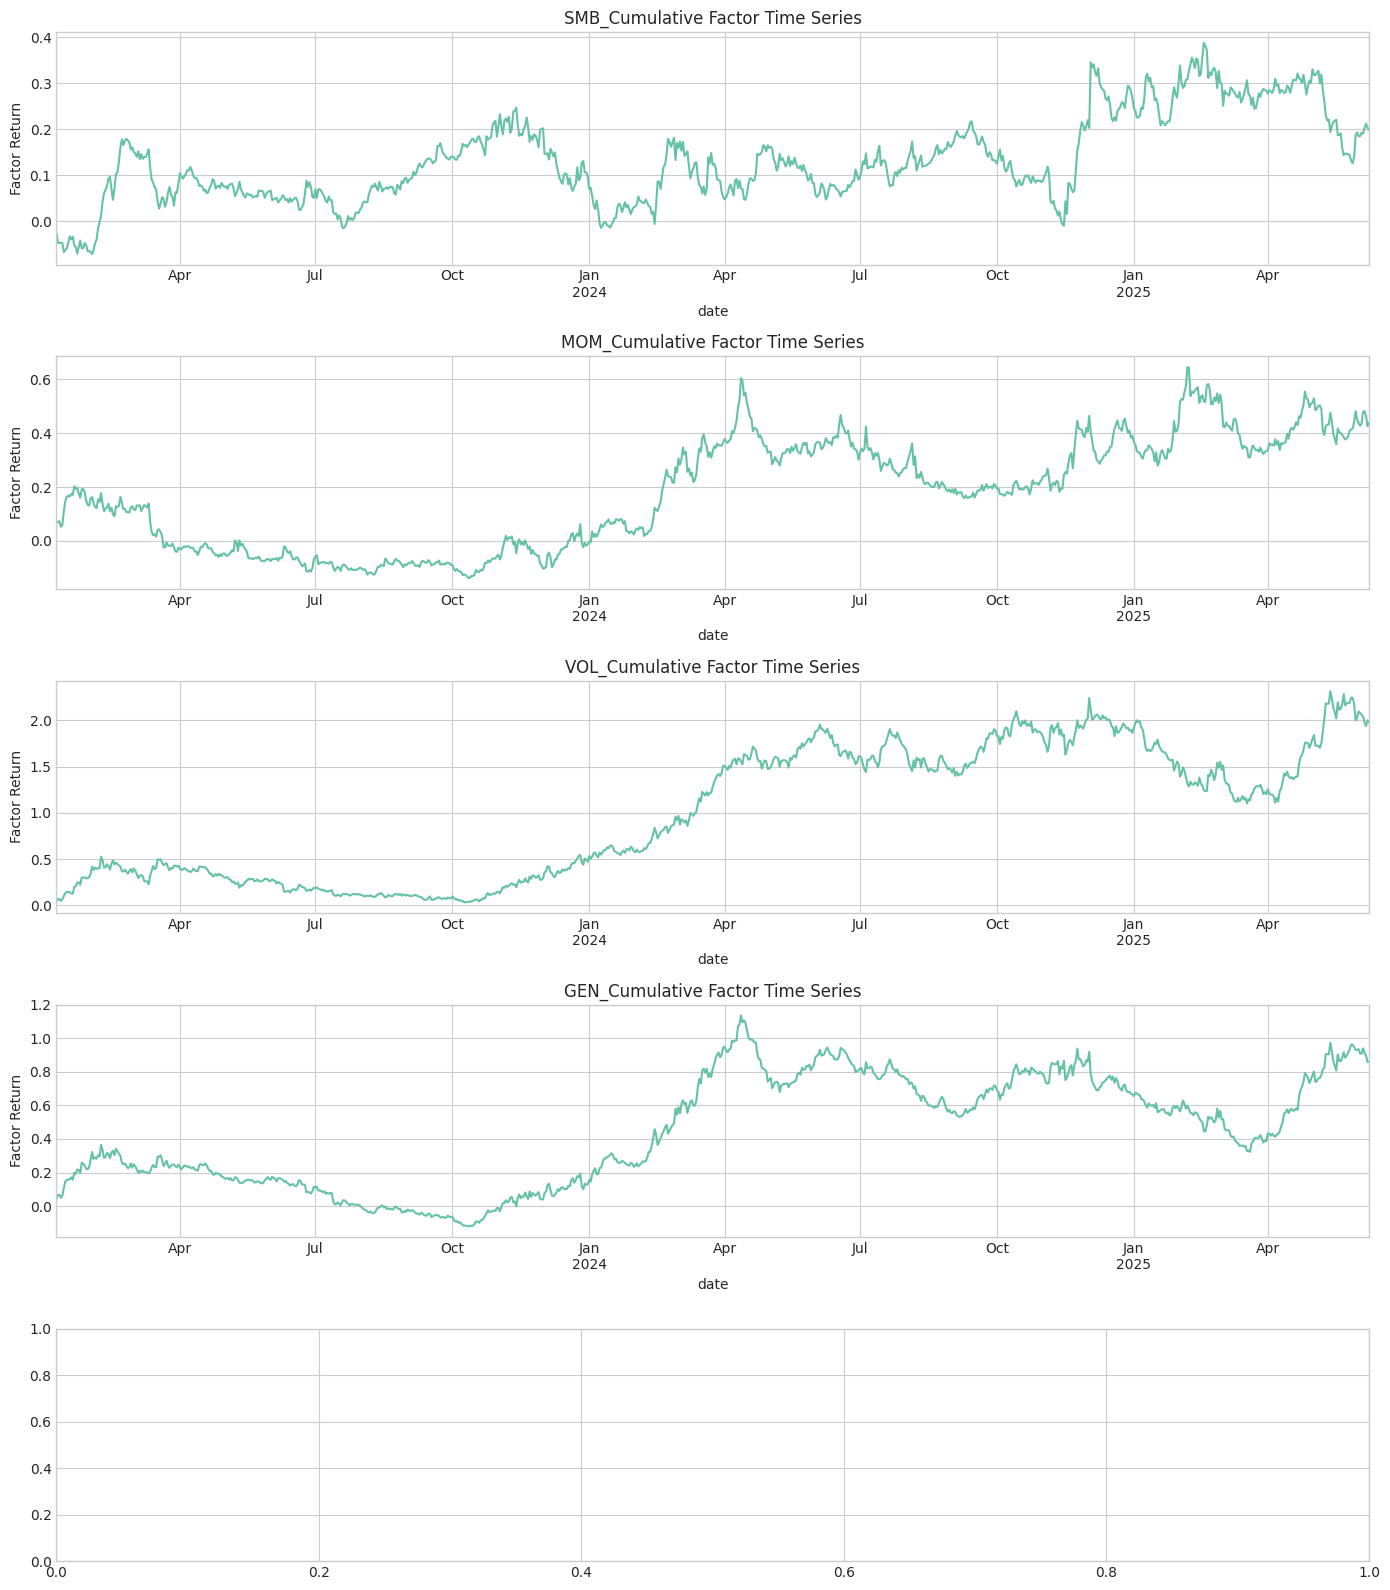

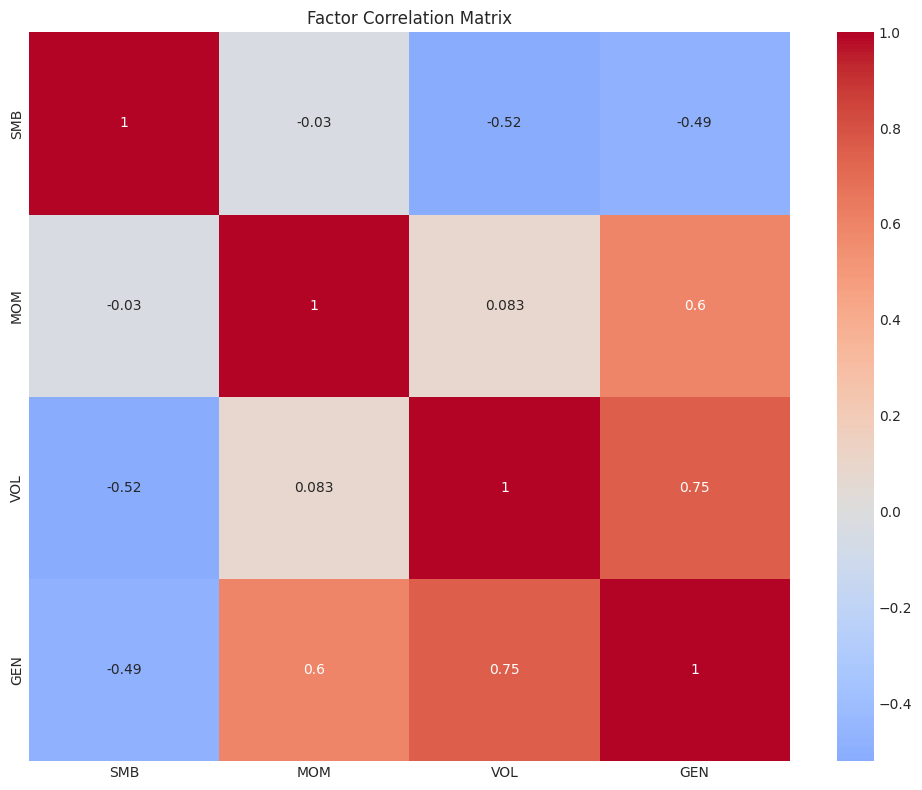

In [32]:
# 绘制因子时间序列
fig, axes = plt.subplots(5, 1, figsize=(14, 16))
for i, factor in enumerate(['SMB_Cumulative', 'MOM_Cumulative', 'VOL_Cumulative','GEN_Cumulative']):
    factors[factor].plot(ax=axes[i], title=f'{factor} Factor Time Series')
    axes[i].set_ylabel('Factor Return')
plt.tight_layout()
plt.savefig('factor_time_series.png', dpi=300)

# # 绘制因子相关性热力图
plt.figure(figsize=(10, 8))
sns.heatmap(factors[['SMB', 'MOM', 'VOL', 'GEN']].corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Factor Correlation Matrix')
plt.tight_layout()
plt.savefig('factor_correlation.png', dpi=300)

In [33]:
print("Building factor portfolios...")
n_portfolios = 10

data = data.copy()
data = data[data['date'].isin(factors.index)]

portfolio_dfs = []

for factor in ['amount', 'momentum', 'volatility']:
    portfolio_returns = []
    
    for date, group in tqdm(data.groupby('date'), desc=f"Processing {factor} portfolios"):
        if len(group) < n_portfolios * 3:  # 确保有足够样本
            continue
        # 按因子值分组
        group = group.sort_values(factor)
        group['portfolio'] = pd.qcut(group[factor], n_portfolios, labels=False)
        
        # 计算每个组合的等权重收益率
        port_ret = group.groupby('portfolio')['return'].mean().reset_index()
        port_ret['date'] = date
        portfolio_returns.append(port_ret)
    
    portfolio_returns = pd.concat(portfolio_returns)
    portfolio_returns['factor'] = factor
    portfolio_dfs.append(portfolio_returns)

portfolio_returns = pd.concat(portfolio_dfs)

# 计算投资组合表现统计
portfolio_stats = []
for factor in ['amount', 'momentum', 'volatility']:
    for portfolio in range(n_portfolios):
        port_ret = portfolio_returns[
            (portfolio_returns['factor'] == factor) & 
            (portfolio_returns['portfolio'] == portfolio)]['return']
        
        stats = {
            'factor': factor,
            'portfolio': portfolio,
            'mean_return': port_ret.mean(),
            'std_dev': port_ret.std(),
            'sharpe': port_ret.mean() / port_ret.std() * np.sqrt(252),
            'skewness': port_ret.skew(),
            'kurtosis': port_ret.kurtosis(),
            'min': port_ret.min(),
            'max': port_ret.max()
        }
        portfolio_stats.append(stats)

portfolio_stats = pd.DataFrame(portfolio_stats)
portfolio_stats

Building factor portfolios...


Processing volatility portfolios: 100%|██████████| 883/883 [00:02<00:00, 394.91it/s]


,factor,portfolio,mean_return,std_dev,sharpe,skewness,kurtosis,min,max
0,amount,0,0.002063,0.037039,0.884279,0.148807,4.300199,-0.168213,0.270071
1,amount,1,0.001565,0.038743,0.641350,-0.352446,1.612421,-0.181746,0.135636
2,amount,2,0.001358,0.039456,0.546502,-0.285199,1.451755,-0.178421,0.140905
3,amount,3,0.001114,0.039732,0.445023,-0.254896,1.464824,-0.185023,0.145061
4,amount,4,0.001276,0.042033,0.481861,-0.175747,1.907740,-0.184578,0.215054
5,amount,5,0.002150,0.042811,0.797224,-0.050874,2.253793,-0.175492,0.214536
6,amount,6,0.002422,0.044014,0.873706,0.071230,1.257345,-0.166669,0.169051
7,amount,7,0.000996,0.042003,0.376243,-0.017760,1.505886,-0.160491,0.160021
8,amount,8,0.000638,0.042679,0.237173,0.071029,1.738979,-0.185760,0.168488
9,amount,9,0.001931,0.040289,0.760944,0.288943,1.783751,-0.172835,0.185098


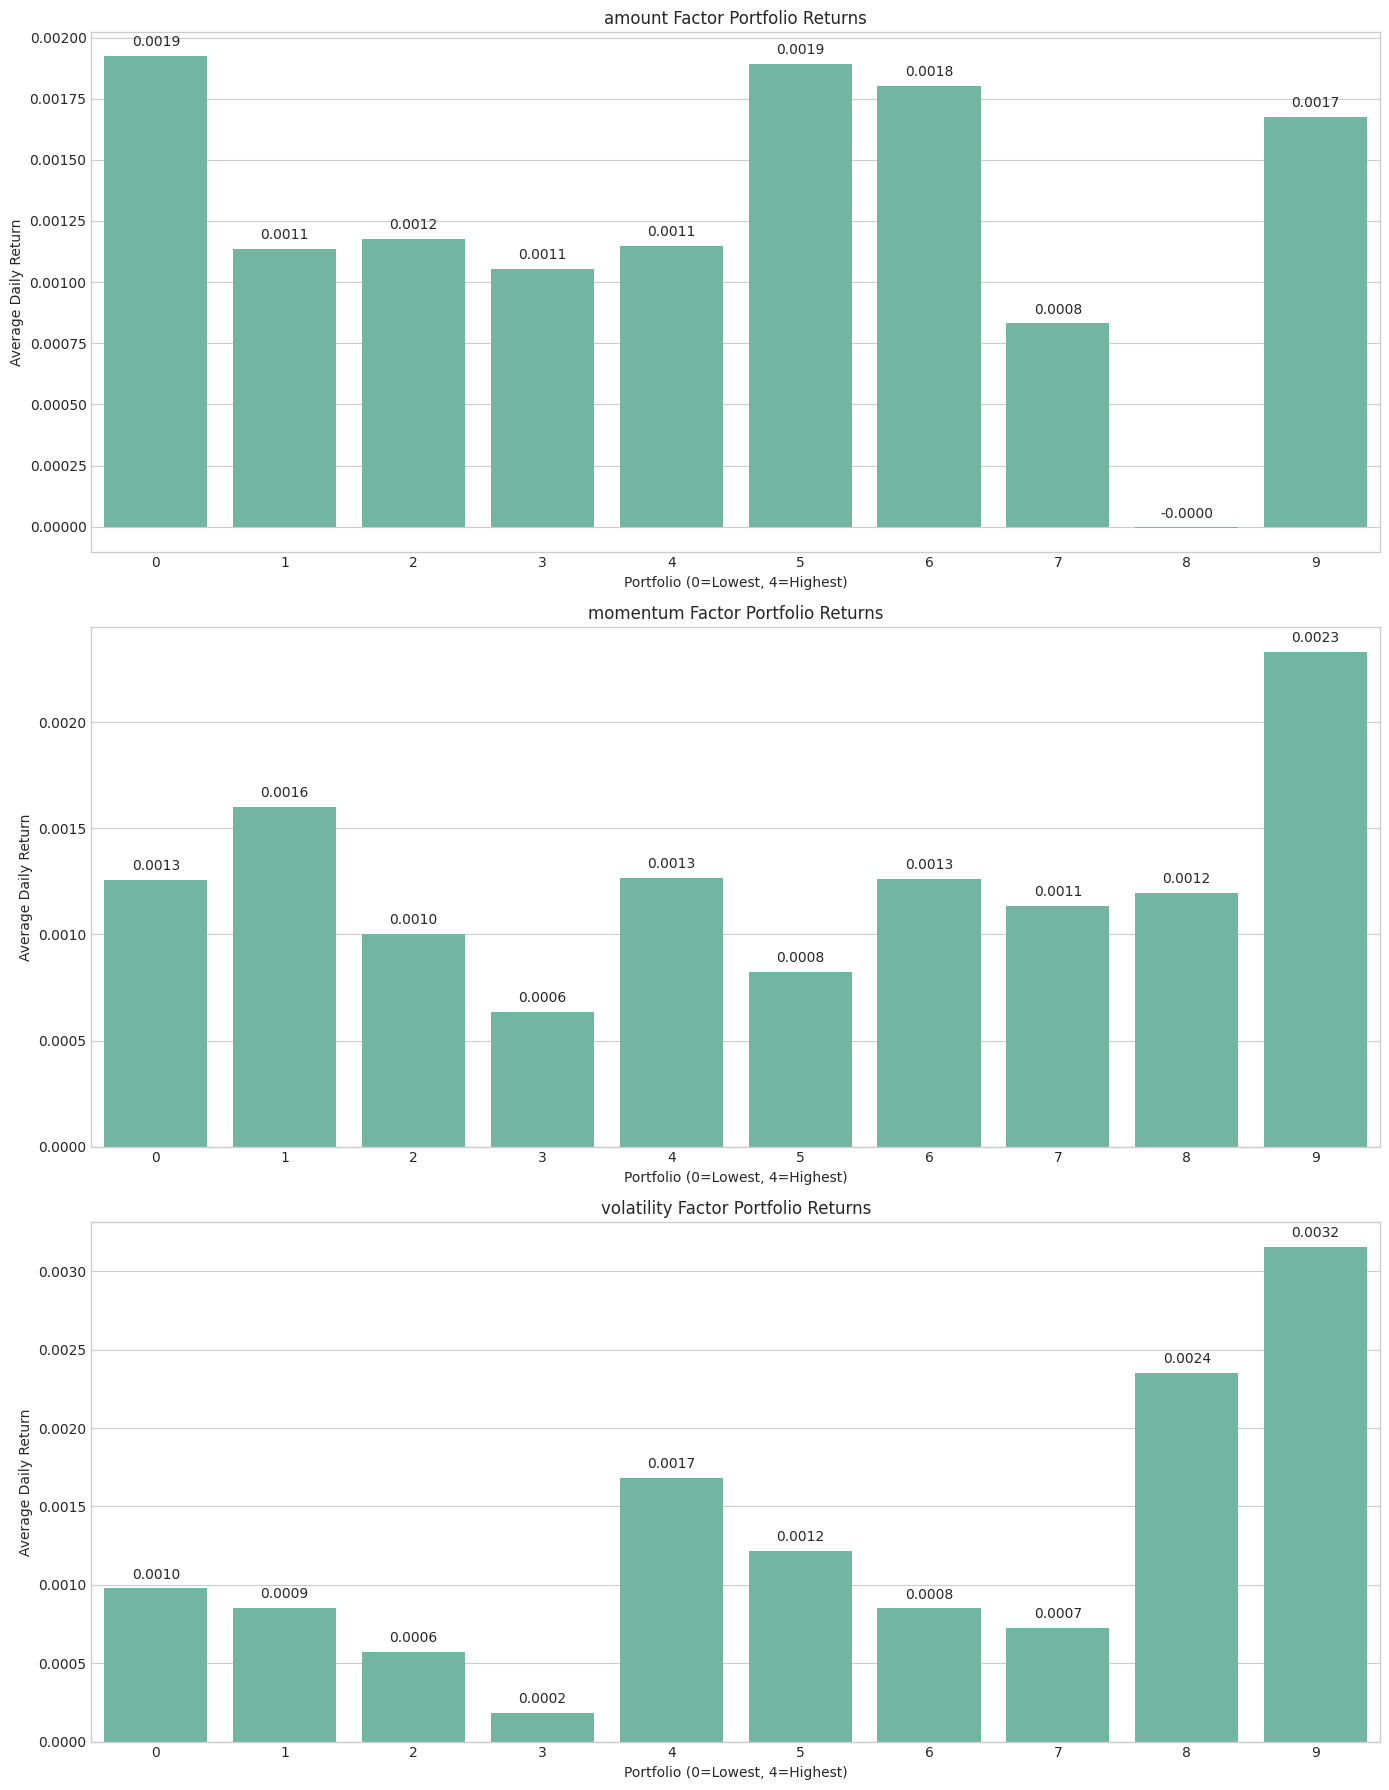

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

for i, factor in enumerate(['amount', 'momentum', 'volatility']):
    factor_name = factor
    
    # 提取该因子的投资组合数据
    factor_data = portfolio_stats[portfolio_stats['factor'] == factor]
    
    # 绘制平均收益率
    ax = axes[i]
    sns.barplot(x='portfolio', y='mean_return', data=factor_data, ax=ax)
    ax.set_title(f'{factor_name} Factor Portfolio Returns')
    ax.set_xlabel('Portfolio (0=Lowest, 4=Highest)')
    ax.set_ylabel('Average Daily Return')
    
    # 添加数值标签
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.4f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points')

plt.tight_layout()
plt.savefig('portfolio_performance.png', dpi=300)

In [15]:
print("Running multifactor regression...")

# 准备数据
data = data.copy()
data = data[data['date'].isin(factors.index)]

# 创建结果容器
results = []
        
# 对每个币种运行时间序列回归
for symbol, symbol_data in tqdm(data.groupby('symbol'), desc="Running regressions"):
    if len(symbol_data) < 100:  # 至少需要100个观测值
        continue
    
    # 合并因子数据
    merged = symbol_data.merge(factors.reset_index(), on='date')
    
    # 因变量
    y = merged['return']
    
    # 自变量
    X = merged[['const', 'MKT','SMB', 'MOM', 'VOL']]
    
    try:
        # 运行OLS回归
        model = sm.OLS(y, X, missing='drop').fit()
        # 存储结果
        res = {
            'symbol': symbol,
            'alpha': model.params['const'],
            'beta_mkt': model.params['MKT'],
            'beta_smb': model.params['SMB'],
            'beta_mom': model.params['MOM'],
            'beta_vol': model.params['VOL'],
            'r_squared': model.rsquared,
            't_alpha': model.tvalues['const'],
            't_mkt': model.tvalues['MKT'],
            't_smb': model.tvalues['SMB'],
            't_mom': model.tvalues['MOM'],
            't_vol': model.tvalues['VOL'],
            'nobs': model.nobs
        }
        results.append(res)
    except:
        print('error')
        continue

model_results = pd.DataFrame(results)
model_results

Running multifactor regression...


Running regressions: 100%|██████████| 139/139 [00:00<00:00, 306.46it/s]


,symbol,alpha,beta_mkt,beta_bms,beta_mom,beta_vol,r_squared,t_alpha,t_mkt,t_bms,t_mom,t_vol,nobs
0,1INCH/USDT:USDT,-0.002350,1.124933,-0.369130,0.147054,-0.213764,0.755252,-1.436672,19.801245,-3.687701,2.489323,-2.253369,513.0
1,AAVE/USDT:USDT,0.004064,1.224022,0.380300,0.040534,-0.544123,0.574740,1.701470,14.755205,2.601914,0.469905,-3.928126,513.0
2,ACH/USDT:USDT,-0.001506,0.898307,-0.601833,0.090790,0.344742,0.434417,-0.425255,7.304414,-2.777455,0.709964,1.678753,513.0
3,ADA/USDT:USDT,-0.001195,1.381678,0.555171,0.271561,-0.811274,0.558058,-0.469302,15.622860,3.562803,2.952973,-5.493555,513.0
4,AERO/USDT:USDT,-0.011427,1.071668,-0.208229,0.402068,0.204616,0.679848,-2.445074,7.669278,-0.692479,2.395977,0.818922,176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,ZEC/USDT:USDT,0.003870,0.859527,-0.670073,0.006655,-0.048500,0.479352,1.578870,10.098509,-4.468177,0.075189,-0.341251,513.0
129,ZIL/USDT:USDT,-0.004557,1.096046,-0.498076,0.232450,-0.116895,0.872653,-4.063573,28.145381,-7.259132,5.740455,-1.797656,513.0
130,ZK/USDT:USDT,0.001195,1.146805,0.003896,-0.183607,0.062545,0.806482,0.564628,15.822371,0.029327,-2.423709,0.524621,346.0
131,ZRO/USDT:USDT,0.002626,0.971337,-0.039617,-0.128359,0.205907,0.521528,0.682863,7.388939,-0.164677,-0.935291,0.950111,343.0


In [ ]:
# 参数名	    经济含义	        统计解释
# alpha	    截距项（超额收益）	当所有因子为0时的预期收益
# beta_mkt	市场风险暴露（如大盘涨跌敏感性）	每单位市场因子变动带来的收益变化
# beta_pri	价值因子暴露（如BP比率）	价值股相对成长股的收益溢价
# beta_smb	账面市值比因子暴露	高B/M股票的特有风险补偿
# beta_mom	动量因子暴露	过去赢家组合的持续收益能力
# beta_vol	波动率因子暴露	高波动股票的额外风险补偿


# 参数名	     判断标准	
# r_squared	 0-1之间，越接近1越好	模型解释力（如0.3表示因子解释30%收益波动）
# t_alpha	 |t|>2为显著	是否存在超额收益（alpha≠0）
# t_mkt	     |t|>2为显著	市场因子是否有效
# t_pri	     |t|>2为显著	价值因子是否有效
# nobs	     样本量越大越可靠	回归自由度（一般需>30）


Analyzing regression results...


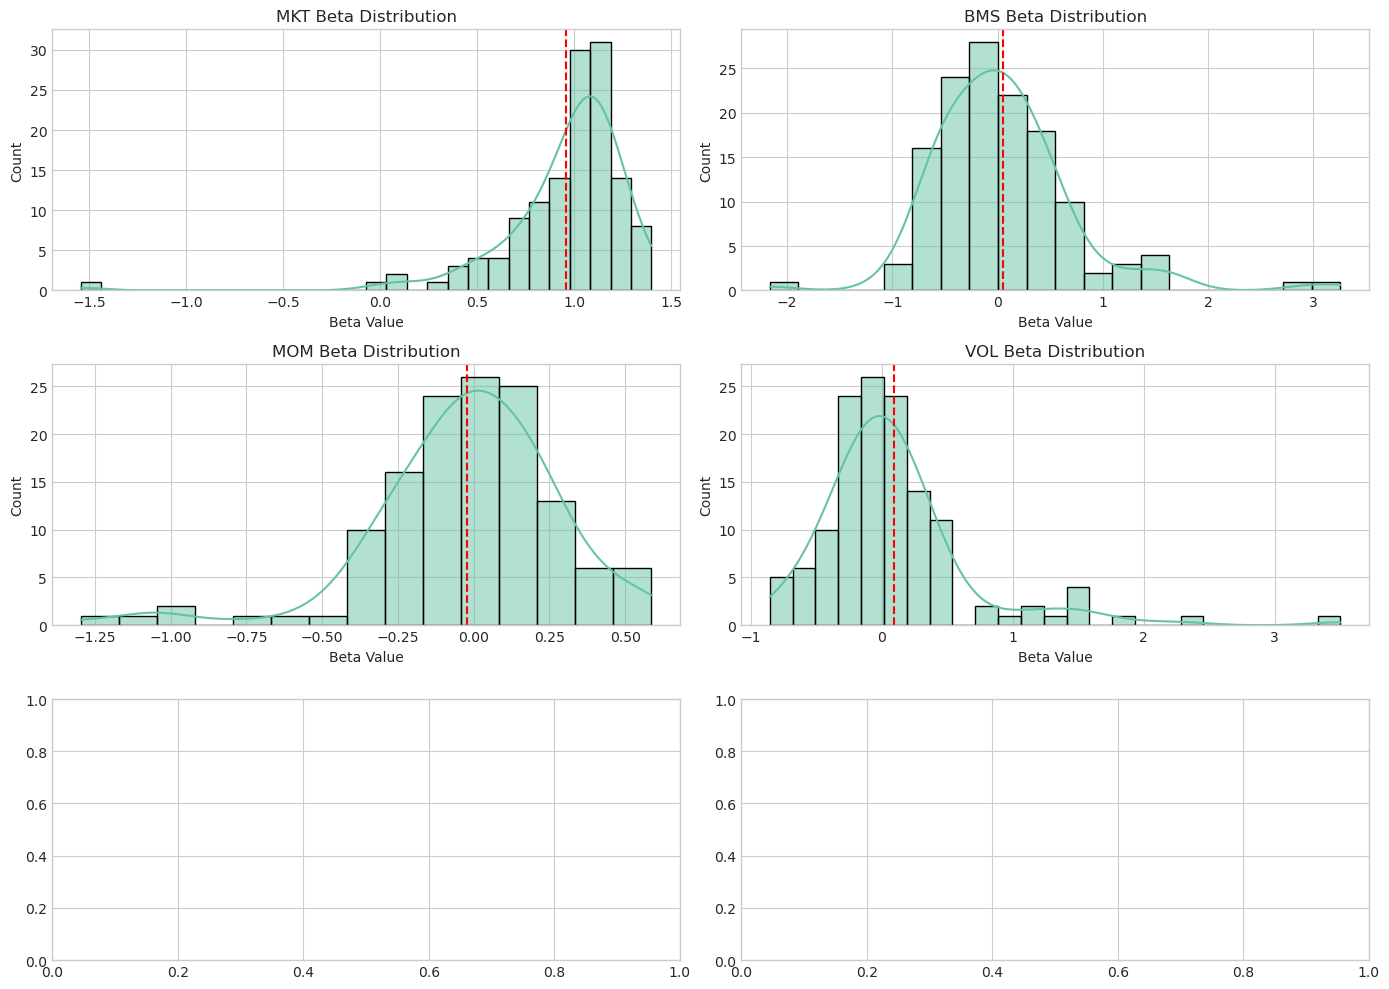

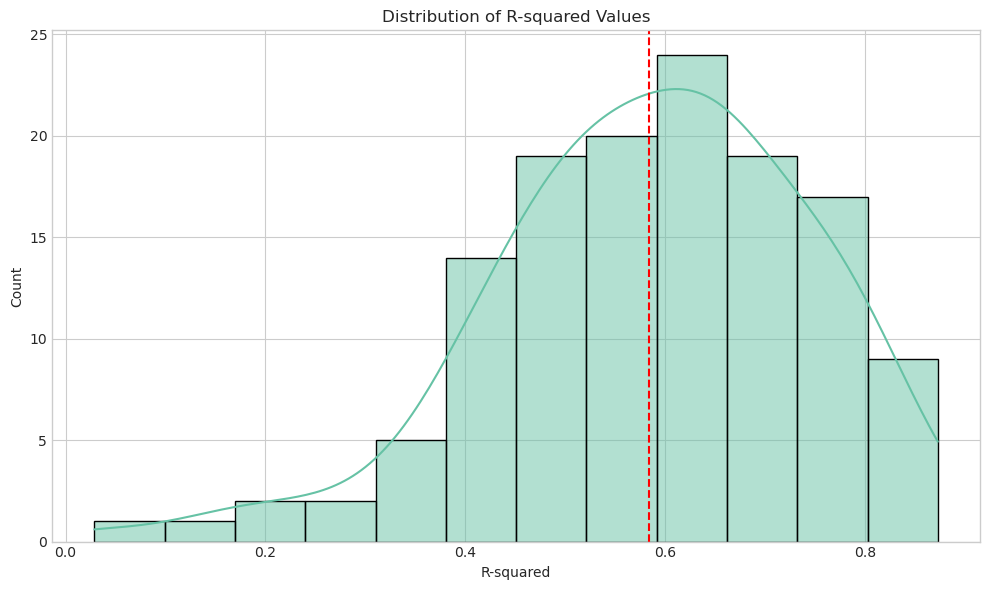

In [16]:
print("Analyzing regression results...")

# 整体平均因子暴露
avg_exposure = model_results[['beta_mkt', 'beta_smb', 'beta_mom', 'beta_vol']].mean()
t_stats = model_results[['t_mkt', 't_smb', 't_mom', 't_vol']].mean()

exposure_stats = pd.DataFrame({
    'Average Beta': avg_exposure,
    'Average t-stat': t_stats
})

# 绘制因子暴露分布
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

for i, factor in enumerate(['beta_mkt', 'beta_smb', 'beta_mom', 'beta_vol']):
    sns.histplot(model_results[factor], kde=True, ax=axes[i])
    axes[i].set_title(f'{factor[5:].upper()} Beta Distribution')
    axes[i].set_xlabel('Beta Value')
    axes[i].axvline(model_results[factor].mean(), color='r', linestyle='--')

plt.tight_layout()
plt.savefig('beta_distribution.png', dpi=300)

# 绘制R²分布
plt.figure(figsize=(10, 6))
sns.histplot(model_results['r_squared'], kde=True)
plt.axvline(model_results['r_squared'].mean(), color='r', linestyle='--')
plt.title('Distribution of R-squared Values')
plt.xlabel('R-squared')
plt.tight_layout()
plt.savefig('rsquared_distribution.png', dpi=300)

In [33]:
alphas = model_results['alpha']
residual_vars = [1 - row['r_squared'] for _, row in model_results.iterrows()]  # 简化估计

# GRS统计量计算（简化版）
grs_stat = (alphas.mean() ** 2) / (np.array(residual_vars).mean() / len(alphas))
grs_stat * 100000

0.009005416936844054

Building investment portfolio...


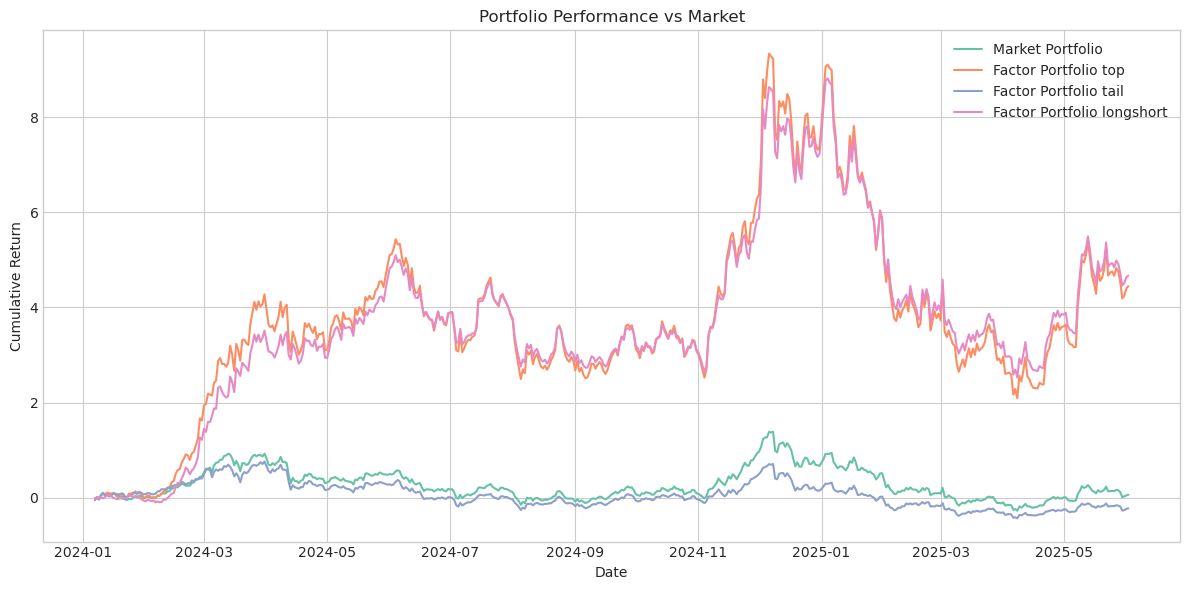